# Shivam Chauhan Week 5 Assignment: SVM on Titanic data

In [1]:
#importing library
import pandas as pd
import numpy as np
import os

In [8]:
#load the data
os.getcwd()
os.chdir("C:/Users\Shivam\OneDrive - Northeastern University\STUDY\EAI 6000 - FAI\Week 1 - logistic")
os.getcwd()
df = pd.read_csv("test_data.csv")

In [9]:
#Removing the unique ID which are column 1 and 2. 
df.drop(df.columns[:2], axis=1,inplace=True)
df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [11]:
#Creating arrays for train data and test data. Also removing the unique ID which are column 1 and 2. 
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [13]:
#splitting data into train ad test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# SVM Model

In [162]:
#importing svm model from sklearn and fitting the data
from sklearn import svm
clf = svm.SVC(kernel='rbf' ,gamma = 'auto', random_state=0)
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

After trying different Kernal, I found 'rbf' to work best for this data.

In [163]:
#predicting the test set
y_pred = clf.predict(X_test)

In [164]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[11,  0],
       [ 4,  5]], dtype=int64)

In [187]:
acc_svm = accuracy_score(y_pred,y_test)
acc_svm

0.8

Accuracy of this svm model is 80%. 

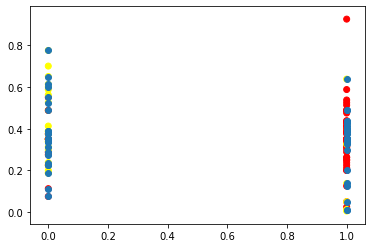

In [186]:
from matplotlib import pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='autumn')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1])



The yellow and read are different classes and the blue points are the different support vectors in this model. 

# Model Comparision

In [200]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
log_m = LogisticRegression()
log_m.fit(X_train,y_train)
y_pred_lm = log_m.predict(X_test)
accuracy_lm = accuracy_score(y_test,y_pred_lm)
accuracy_lm

C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8

In [201]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
Dtree_acc= accuracy_score(y_test,predictions)
Dtree_acc

0.75

In [226]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test,rfc_pred)
rfc_acc

0.9

In [203]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
KNN1= accuracy_score(y_test,y_pred1)
KNN1

0.9

In [227]:
Models = {'Logistic Regression' : accuracy_lm , 'Decision Tree' : Dtree_acc , 'Random Forest' : rfc_acc , 'KNN' : KNN1, 'SVM': acc_svm}
df_m = pd.DataFrame.from_dict(Models, orient='index',columns=['Accuracy'])
df_m

,Accuracy
Logistic Regression,0.80
Decision Tree,0.75
Random Forest,0.90
KNN,0.90
SVM,0.80


We can see Knn and Random forest work well for this model. We have seen that due to small data we have trained, K value for KNN is 1 in this case. So random forest predicts most accurately for this data set. 